In [1]:
from mdagent import MDAgent
import os 

In [2]:
import sys
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(parent_dir)
from robustness_prompts import get_prompt

prompt_5_descriptive = get_prompt("descriptive", 5)
prompt_5_natural = get_prompt("natural", 5)

prompt_5_descriptive, prompt_5_natural

('Complete all of the following tasks: 1. Download the PDB file 1LYZ. 2. Report the secondary structure assignments of the downloaded PDB structure. 3. Simulate for 1ps at 300 K. 4. Compute the RMSD. 5. Compute the radius of gyration over time.',
 'Simulate 1LYZ for 1ps at 300 K. Report the secondary structure assignments of the downloaded PDB structure, and compute the RMSD and radius of gyration of the simulation.')

In [3]:
llm_model = "accounts/fireworks/models/llama-v3p1-405b-instruct"
tools = "all"

In [8]:
agent_1 = MDAgent(agent_type="Structured", model=llm_model, top_k_tools=tools, use_memory=False)
agent_1.run(prompt_5_descriptive)

Thought: First, I need to download the PDB file 1LYZ.
Action:
```
{
  "action": "PDBFileDownloader",
  "action_input": "1LYZ"
}
```
PDB file found with this ID: 1LYZ
Next, I need to report the secondary structure assignments of the downloaded PDB structure.

Action:
```
{
  "action": "ComputeDSSP",
  "action_input": {
    "traj_file": "1LYZ_103545",
    "top_file": "1LYZ_103545",
    "target_frames": "first"
  }
}
```Next, I need to simulate for 1ps at 300 K.

Action:
```
{
  "action": "SetUpandRunFunction",
  "action_input": {
    "pdb_id": "1LYZ_103545",
    "forcefield_files": ["amber99sbildn.xml"],
    "save": True,
    "system_params": {
      "nonbondedMethod": "NoCutoff",
      "constraints": "None",
      "rigidWater": False
    },
    "integrator_params": {
      "integrator_type": "LangevinMiddle",
      "Temperature": "300 * kelvin",
      "Friction": "1.0 / picoseconds",
      "Timestep": "0.002 * picoseconds",
      "Pressure": "1.0 * bar"
    },
    "simulation_params": {

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

In [9]:
registry_1 = agent_1.path_registry
print(registry_1.list_path_names_and_descriptions().replace(",", "\n"))

Files found in registry: 1LYZ_103545: PDB file downloaded from RSCB
 PDBFile ID: 1LYZ_103545
 rec0_103546: dssp values for trajectory with id: 1LYZ_103545


In [10]:
# make sure pdb was downloaded
assert os.path.exists(registry_1.get_mapped_path("1LYZ_103545"))

In [11]:
# make sure dssp was computed correctly
from mdagent.tools.base_tools import ComputeDSSP

dssp = ComputeDSSP(registry_1)
dssp._run(traj_file= "1LYZ_103545", target_frames="first")

"{'residues in helix': 50, 'residues in strand': 14, 'residues in coil': 65, 'residues not assigned, not a protein residue': 101}"

In [ ]:
## make sure trajectory and topology exist
# traj_path_1 = registry_1.get_mapped_path("<traj_path>")
# top_path_1 = registry_1.get_mapped_path("<top_path>")

# assert os.path.exists(traj_path_1)
# assert os.path.exists(top_path_1)

In [ ]:
# # make sure rmsd plot was generated
# from IPython.display import Image
# Image(filename=registry_1.get_mapped_path('<rmsd_plot>'))

In [ ]:
# # make sure rgy plot was generated
# from IPython.display import Image
# Image(filename=registry_1.get_mapped_path('<rgy_plot>'))

In [6]:
agent_2 = MDAgent(agent_type="Structured", model=llm_model, top_k_tools=tools, use_memory=False)
agent_2.run(prompt_5_natural)

Thought: First, I need to download the PDB file for 1LYZ. Then, I can simulate it for 1ps at 300 K using the SetUpandRunFunction tool. After that, I can use the ComputeDSSP tool to get the secondary structure assignments of the downloaded PDB structure. Finally, I can use the ComputeRMSD and RadiusofGyrationTool tools to compute the RMSD and radius of gyration of the simulation.

Action:
```
{
  "action": "PDBFileDownloader",
  "action_input": "1LYZ"
}
```
PDB file found with this ID: 1LYZ
Thought: Now that I have the PDB file, I can simulate it for 1ps at 300 K using the SetUpandRunFunction tool.

Action:
```
{
  "action": "SetUpandRunFunction",
  "action_input": {
    "pdb_id": "1LYZ_102435",
    "forcefield_files": ["amber99sbildn.xml"],
    "save": true,
    "system_params": {
      "nonbondedMethod": "NoCutoff",
      "constraints": "None",
      "rigidWater": false
    },
    "integrator_params": {
      "integrator_type": "LangevinMiddle",
      "Temperature": "300 * kelvin",
  

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

<Figure size 640x480 with 0 Axes>

In [12]:
registry_2 = agent_2.path_registry
print(registry_2.list_path_names_and_descriptions().replace(",", "\n"))

Files found in registry: 1LYZ_102435: PDB file downloaded from RSCB
 PDBFile ID: 1LYZ_102435
 1LYZ_102444: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_102449: Initial positions for simulation sim0_102449
 sim0_102449: Basic Simulation of Protein 1LYZ_102444
 rec0_102449: Simulation trajectory for protein 1LYZ_102444 and simulation sim0_102449
 rec1_102449: Simulation state log for protein 1LYZ_102444 and simulation sim0_102449
 rec2_102449: Simulation pdb frames for protein 1LYZ_102444 and simulation sim0_102449
 rec0_102459: dssp values for trajectory with id: rec2_102449
 rmsd_1LYZ: RMSD for 1LYZ
 fig0_102502: RMSD plot for 1LYZ
 rgy_rec0_102449: Radii of gyration per frame for rec0_102449
 fig0_102505: Plot of radii of gyration over time for rec0_102449


In [ ]:
# make sure pdb was downloaded
assert os.path.exists(registry_2.get_mapped_path("1LYZ_102435"))

In [13]:
# make sure dssp was computed correctly
from mdagent.tools.base_tools import ComputeDSSP

dssp = ComputeDSSP(registry_2)
dssp._run(traj_file= "1LYZ_102435", target_frames="first")

"{'residues in helix': 50, 'residues in strand': 14, 'residues in coil': 65, 'residues not assigned, not a protein residue': 101}"

In [14]:
# make sure trajectory and topology exist
traj_path_2 = registry_2.get_mapped_path("rec0_102449")
top_path_2 = registry_2.get_mapped_path("top_sim0_102449")

assert os.path.exists(traj_path_2)
assert os.path.exists(top_path_2)

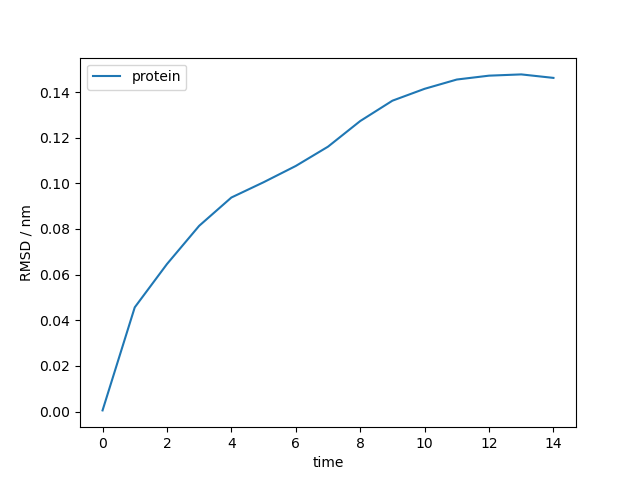

In [15]:
# make sure rmsd plot was generated
from IPython.display import Image
Image(filename=registry_2.get_mapped_path('fig0_102502'))

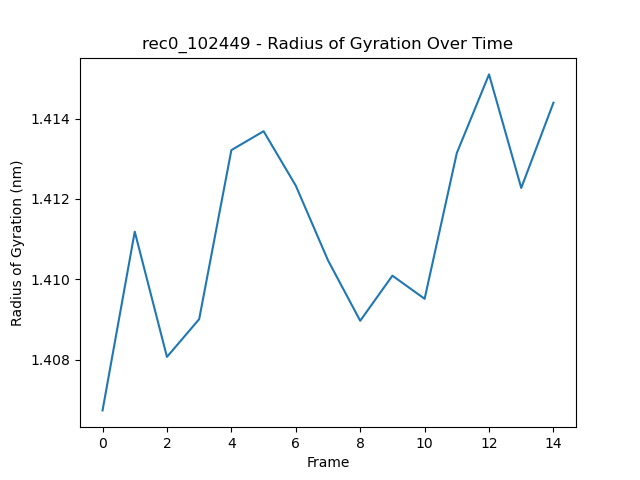

In [18]:
# make sure rgy plot was generated
from IPython.display import Image
Image(filename=registry_2.get_mapped_path('fig0_102505'))